<a href="https://colab.research.google.com/github/albayo/Ajedrez/blob/main/Parte2_Modelo_de_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- *Alumno*: 
- *Asignatura*: Ingeniería del Conocimiento
- *Curso*: 2021/2022
- *Profesor*: Fco. Javier Martínez de Pisón
- Universidad de La Rioja

# Modelo de Regresión Lineal de 'Pollution'

Ahora vamos a realizar un modelo de regresión lineal y vamos a aprender a ajustar e interpretar correctamente un modelo.

La base de datos tiene las siguientes características:

-	PREC: Precipitación media anual en pulgadas.
-	JANT: Temperatura media de enero en grados Fahrenheit (F). 
-	JULT: Igual que en julio.
-	OVR65: % de la población del SMSA de 1960 de 65 años o más.
-	POPN: Tamaño medio de los hogares.
-	EDUC: Promedio de años de estudio completados por los mayores de 22 años.
-	HOUS: % de unidades de vivienda que son sólidas y con todas las instalaciones.
-	DENS: Población por milla cuadrada en áreas urbanizadas, 1960.
-	NONW: % de población no blanca en áreas urbanizadas, 1960.
-	WWDRK: % de empleados en profesiones de cuello blanco.
-	POOR: % de familias con ingresos inferiores a 3.000 dólares
-	HC: Potencial relativo de contaminación por hidrocarburos.
-	NOX: Igual que los óxidos nítricos.
-	SO@: Igual que el dióxido de azufre.
-	HUMID: Promedio anual de humedad relativa a las 13:00 horas.
-	MORT: Tasa de mortalidad total ajustada por edad por cada 100.000.

Data from StatLib (ftp stat.cmu.edu/datasets)

Source: McDonald, G.C. and Schwing, R.C. (1973) 'Instabilities of regression estimates relating air pollution to mortality', Technometrics, vol.15, 463-482.


## Cargar la Base de Datos

En local, si no se dispone en windows del comando 'wget', el archivo se puede descargar directamente del enlace con el navegador: https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff. Incluir el mismo en el directorio donde está almacenado el notebook.

In [119]:
# Funciona en linux y colab
!wget https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff -O pollution_sin_comentarios.arff #Funciona en linux

--2022-03-29 16:07:08--  https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff [following]
--2022-03-29 16:07:08--  https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340 (5.2K) [text/plain]
Saving to: ‘pollution_sin_comentarios.arff’

pollution_sin_comen 100%[===================>]   5.21K  --.-KB/s    in 0s      

2022-03-29 16:07:08 (50.7 MB/s) - ‘pollution_sin_comentarios.arff’ saved [

In [120]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff

In [121]:
df_pollution = pd.DataFrame(arff.loadarff("pollution_sin_comentarios.arff")[0])
print(df_pollution.shape)
df_pollution.head()

(60, 16)


,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


Eliminar los espurios, primero detectamos:
Falta NOX

In [122]:
#df_pollution['HC'].sort_values(ascending=False)

In [123]:
df_pollution['HC'].sort_values(ascending=False)

df_pollution.loc[df_pollution['HC']>300,'HC']=np.nan


In [124]:
df_pollution.loc[df_pollution['HC'].isna(),'HC']=df_pollution['HC'].mean()
df_pollution.describe()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,37.366667,33.983333,74.583333,8.798333,3.263167,10.973333,80.913333,3876.050000,11.870000,46.081667,14.373333,22.620690,22.65000,53.766667,57.666667,940.358433
std,9.984678,10.168899,4.763177,1.464552,0.135252,0.845299,5.141373,1454.102361,8.921148,4.613043,4.160096,25.640162,46.33329,63.390468,5.369931,62.206278
min,10.000000,12.000000,63.000000,5.600000,2.920000,9.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,1.000000,1.00000,1.000000,38.000000,790.733000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,10.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,7.000000,4.00000,11.000000,55.000000,898.372000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,11.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,14.500000,9.00000,30.000000,57.000000,943.683000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,11.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,26.750000,23.75000,69.000000,60.000000,983.205750
max,60.000000,67.000000,85.000000,11.800000,3.530000,12.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,144.000000,319.00000,278.000000,73.000000,1113.156000


In [125]:
#df_pollution['HC'].sort_values(ascending=False)

In [126]:
df_pollution['HC'].sort_values(ascending=False)

df_pollution.loc[df_pollution['NOX']>100,'NOX']=np.nan

In [127]:
df_pollution.loc[df_pollution['NOX'].isna(),'NOX']=df_pollution['NOX'].mean()

# df_pollution.describe()

In [128]:
#df_pollution['NOX'].sort_values(ascending=False)

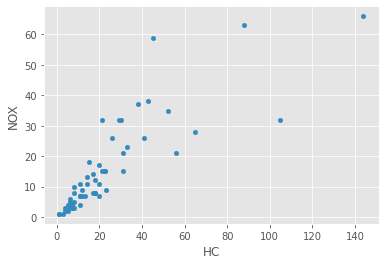

In [129]:
df_pollution[['HC','NOX']].plot(x='HC',y='NOX', kind='scatter')

In [130]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df_pollution.corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
203,NOX,HC,0.844236,0.844236
188,HC,NOX,0.844236,0.844236
220,SO@,NOX,0.757711,0.757711
205,NOX,SO@,0.757711,0.757711
138,NONW,POOR,0.704915,0.704915
168,POOR,NONW,0.704915,0.704915
89,EDUC,WWDRK,0.703196,0.703196
149,WWDRK,EDUC,0.703196,0.703196
106,HOUS,POOR,-0.680680,0.680680
166,POOR,HOUS,-0.680680,0.680680


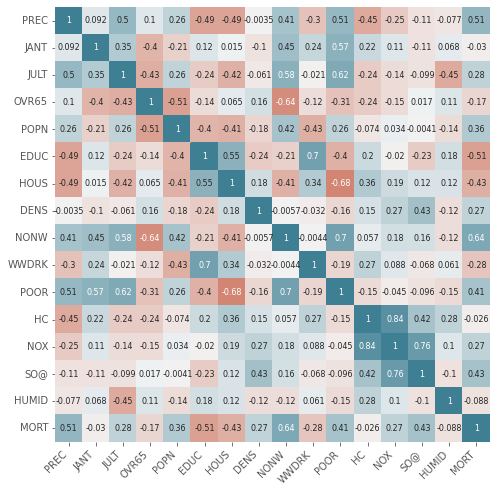

In [131]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Base de datos de Entrenamiento y Testeo

Extraer un 80% de la base de datos para entrenamiento y el otro 20% para testeo.

In [132]:
X = df_pollution.iloc[:,:-1] # Todas las columnas menos la última (variables independientes)
y = df_pollution['MORT'] # Salida (variable dependiente)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle=True)
print(X_train.shape, X_test.shape)

(48, 15) (12, 15)


## Creación y análisis del modelo con todas las Variables

Usando la función OLS() del paquete *statsmodels* vamos a realizar diversos modelos lineales intentando mejorar lo máximo posible el R2 ajustado (*Adj. R-squared*).
1. Crear un modelo lineal con la base de datos de entrenamiento usando todas las variables independientes.
2. Analizar los p-valores de las variables considerando un nivel de confianza del 95% (nivel de significación del p-value<0.05). ¿Cuántas variables independientes están por debajo de ese umbral?
3. Calcular el RMSE y MAE con la matriz de testeo. Interprete el modelo y explique el significado de los errores RMSE y MAE obtenidos.
4. Analizar los coeficientes de las variables climatológicas vs los valores de la matriz de correlación. ¿Qué ocurre aquí?
**Justifica todas las respuestas.**

Nota: *repasar en https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html los apartados relativos a la bondad del ajuste del modelo, las significancia del modelo F-test y de los predictores*.


In [133]:
X_train.head()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0
20,31.0,45.0,85.0,7.3,3.22,11.4,80.7,1844.0,11.5,48.1,18.5,1.0,1.0,1.0,53.0
46,10.0,55.0,70.0,7.3,3.11,12.1,88.9,3033.0,5.9,51.0,14.0,144.0,66.0,20.0,61.0
27,43.0,32.0,74.0,10.1,3.38,9.5,79.2,3214.0,2.9,43.7,12.0,11.0,7.0,32.0,54.0
21,31.0,24.0,72.0,9.0,3.37,10.9,82.8,3226.0,5.1,45.2,12.3,5.0,3.0,10.0,61.0


PARA QUITAR VARIABLES

In [134]:

#CREAR UN MODELO CON LAS NUEVAS COLUMNAS
# modelo  = sm.OLS(endog=y_train, exog=X_train,)
# seleccionadas=np.setdiff1d(feat_names,['NOX','POPN'])
# print(seleccionadas)
# X_train_new =sm.add_constant(X_train[seleccionadas],prepend=True)
# modelo  = modelo.fit()
# print(modelo.summary())

In [135]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo

feat_names=X_train.columns
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

# El warning de abajo nos dice que quitemos las variables correladas y volvamos a hacer el summary
# Al haber muchas variables correladas/colineales el pvalor no es el real

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     8.332
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           3.06e-07
Time:                        16:07:10   Log-Likelihood:                -230.17
No. Observations:                  48   AIC:                             492.3
Df Residuals:                      32   BIC:                             522.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1966.1026    614.344      3.200      0.0

In [136]:
# P VALOR P>|T|:
  # ESTÁN EN PROCENTAJE, CUANTO MÁS BAJO + SIGNIFICATIVA

  # INTERVALOS DE CONFIANZA:
  # SI VA DE NEGATIVO A POSITIVO INDICA QUE ESTA EL 0 EN MEDIO, 
  # ENTONCES PUEDE PASAR QUE EL COEFICIENTE SEA 0 -> NO CUENTE

  # COLINEALIDAD: similar a correlada

In [137]:
# MAE + RMSE

from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test = sm.add_constant(X_test, prepend=True)
y_hat = modelo.predict(X_test)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = mean_squared_error(y_test, y_hat, squared=False)
print(f'MAE={MAE:0.3f}, RMSE={RMSE:0.3f}')

MAE=33.143, RMSE=39.023


quitamos POOR NOX Y WDORK

In [138]:
selec=np.setdiff1d(feat_names,['NOX','POOR','WWDRK'])
print(selec)


['DENS' 'EDUC' 'HC' 'HOUS' 'HUMID' 'JANT' 'JULT' 'NONW' 'OVR65' 'POPN'
 'PREC' 'SO@']


In [139]:

corr_matrix = X_train_new.corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
46,HOUS,PREC,-0.660297,0.660297
123,PREC,HOUS,-0.660297,0.660297
121,PREC,EDUC,-0.642114,0.642114
22,EDUC,PREC,-0.642114,0.642114
103,OVR65,NONW,-0.606982,0.606982
92,NONW,OVR65,-0.606982,0.606982
90,NONW,JULT,0.584333,0.584333
79,JULT,NONW,0.584333,0.584333
132,SO@,DENS,0.537481,0.537481
11,DENS,SO@,0.537481,0.537481


In [152]:
X_train_new =sm.add_constant(X_train[selec],prepend=True)
X_test_new = sm.add_constant(X_test[selec], prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train_new,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     11.14
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           1.12e-08
Time:                        16:10:59   Log-Likelihood:                -230.59
No. Observations:                  48   AIC:                             487.2
Df Residuals:                      35   BIC:                             511.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2030.0995    556.221      3.650      0.0

EL AIC Y BIC SON ERRORES CUANTO MAS BAJO MEJOR, MIENTRAS QUE EL RSQUARED CUANTO MAS ALTO MEJOR

In [141]:
# EL AIC Y BIC SON ERRORES CUANTO MAS BAJO MEJOR, MIENTRAS QUE EL RSQUARED CUANTO MAS ALTO MEJOR
# Los resultados han empeorado, es una BD pequeña y no nos podemos fiar del RMSE y MAE



In [153]:
# X_test_new = sm.add_constant(X_test[selec], prepend=True)
y_hat = modelo.predict(X_test_new)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = mean_squared_error(y_test, y_hat, squared=False)
print(f'MAE={MAE:0.3f}, RMSE={RMSE:0.3f}')

MAE=39.667, RMSE=44.704


In [143]:
#VAMOS A IR QUITANDO LA QUE + PVALOR TIENE Y CALCULAMOS EL MODELO


## Modelo eliminando variables con alta correlación

Utilizando la función *tidy_corr_matrix()* analizar las variables que tienen una correlación mayor de 0.65 (en valor absoluto).
- Entre parejas de variables con alta correlación, eliminar una de ellas y obtener un nuevo modelo sin esas variables.
- Observar el R2 ajustado, el *Prob (F-statistic)* del modelo y los errores MAE y RMSE con la base de datos de testeo. ¿Han mejorado?
- ¿Cuántas variables independientes tienen ahora significancia estadística? 

**Justifica todas las respuestas**

## Creación de un modelo con Selección Hacia Atrás (Backwards)

La función *elimina_mayor_p_valor()* devuelve un array con las variables de entrada eliminando el atributo que mayor *p-value* tiene. 
- Utilizando esta función, realizar una búsqueda hacia atrás, *backwards*, eliminando variables hasta que el RMSE de testeo deje de bajar.
- Para cada paso, guardar el R2 Ajustado, el *Prob (F-statistic)* del modelo y, los errores MAE y RMSE con la base de datos de testeo.
- **Crear una tabla** mostrando la evolución de los resultados del proceso *backwards* paso a paso.

**Justifica todas las respuestas**

In [144]:
# Función que devuelve todas las variables independientes excepto la que tiene mayor p_valor
def elimina_mayor_p_valor(x,y):
    modelo_OLS = sm.OLS(y, x).fit()
    pvalores = modelo_OLS.pvalues
    donde_mayor = np.argmax(pvalores)
    print(f"Eliminada la variable = {pvalores.index[donde_mayor]} con p-value={pvalores[donde_mayor]}")
    return np.setdiff1d(pvalores.index, pvalores.index[donde_mayor])
selec_vars = X_train.columns
elimina_mayor_p_valor(X_train[selec_vars], y_train)


Eliminada la variable = SO@ con p-value=0.9479792918682248


array(['DENS', 'EDUC', 'HC', 'HOUS', 'HUMID', 'JANT', 'JULT', 'NONW',
       'NOX', 'OVR65', 'POOR', 'POPN', 'PREC', 'WWDRK', 'const'],
      dtype=object)

In [145]:
salida=[]
# for h in range(len(select_vars)):
#     # selec_vars=
#     salida.append(dict(h=h, MAE=MAE,RNSE=RMSE,RADJ=RADJ))
#     salida=pd.DataFrame(salida);

## Interpretación de resultados

Con el mejor modelo conseguido:
- Analizar los resultados que muestra la función OLS().
- Interpretar los atributos finales y su importancia analizando: el *p-value* de los mismos, y sus intervalos de confianza. ¿Qué crees que explica cada una de las características?
 Comparar los errores MAE y RMSE con la base de datos de testeo y con los mejores modelos de los puntos anteriores.
- Dibujar los residuos usando el código de ejemplo y explicar lo que indica cada una de las gráficas.

**Justifica todas las respuestas**

In [146]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     11.14
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           1.12e-08
Time:                        16:07:11   Log-Likelihood:                -230.59
No. Observations:                  48   AIC:                             487.2
Df Residuals:                      35   BIC:                             511.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2030.0995    556.221      3.650      0.0

In [151]:
selec

array(['DENS', 'EDUC', 'HC', 'HOUS', 'HUMID', 'JANT', 'JULT', 'NONW',
       'OVR65', 'POPN', 'PREC', 'SO@'], dtype=object)

In [154]:

X_train_new =sm.add_constant(X_train[selec],prepend=True)
X_test_new = sm.add_constant(X_test[selec], prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
prediccion_train = modelo.predict(X_train[selec]).values
residuos_train   = prediccion_train - y_train.values

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
# fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

ValueError: ignored

# Para profundizar

- Lección 5. Regresión Lineal, No Lineal y Logística.
- Regresión lineal con Python. Joaquin Amat Rodrigo. Octubre, 2020. https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
- Step by Step Regression & Backwards Elimination. https://www.kaggle.com/ashishsaxena2209/step-by-step-regression-backward-elimination

# Recuerda 

Si usas Colab, recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.